In [3]:
!pip install opencv-python

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Image Thresholding
__Image result for what is image thresholding in opencv
Thresholding is a technique in OpenCV, which is the assignment of pixel values in relation to the threshold value provided. In thresholding, each pixel value is compared with the threshold value. If the pixel value is smaller than the threshold, it is set to 0, otherwise, it is set to a maximum value (generally 255)__

Syntax: cv2.threshold(source, thresholdValue, maxVal, thresholdingTechnique)

Parameters:

-> source: Input Image array (must be in Grayscale).

-> thresholdValue: Value of Threshold below and above which pixel values will change accordingly.

-> maxVal: Maximum value that can be assigned to a pixel.

-> thresholdingTechnique: The type of thresholding to be applied.

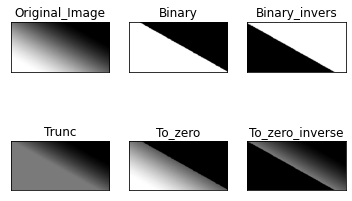

In [2]:
img = cv2.imread('C:/Users/sharv/gredient.jpg')

ret,thresh1=cv2.threshold(img,90,255,cv2.THRESH_BINARY)
ret,thresh2=cv2.threshold(img,122,255,cv2.THRESH_BINARY_INV)
ret,thresh3=cv2.threshold(img,122,255,cv2.THRESH_TRUNC)
ret,thresh4=cv2.threshold(img,90,255,cv2.THRESH_TOZERO)
ret,thresh5=cv2.threshold(img,122,255,cv2.THRESH_TOZERO_INV)

title = ['Original_Image','Binary','Binary_invers','Trunc','To_zero','To_zero_inverse']
source = [img,thresh1,thresh2,thresh3,thresh4,thresh5]

for i in range(len(source)):
    plt.subplot(2,3,i+1)
    plt.imshow(source[i],'gray');
    plt.title(title[i])
    plt.xticks([]),plt.yticks([])    # remove scale from both axis
plt.show;

In [3]:
# create the new window with source img

In [ ]:
img = cv2.imread('C:/Users/sharv/gredient.jpg')
retval, threshold = cv2.threshold(img, 12, 255, cv2.THRESH_BINARY)
window_name = ['original','threshold']
cv2.imshow(window_name[0],img)
cv2.imshow(window_name[1],threshold)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Morphological Transformations

Morphological transformations are some simple operations based on the image shape. It is normally performed on binary images. It needs two inputs, one is our original image, second one is called structuring element or kernel which decides the nature of operation. Two basic morphological operators are Erosion and Dilation. Then its variant forms like Opening, Closing, Gradient etc also comes into play. 


### 1. Erosion

The basic idea of erosion is just like soil erosion only, it erodes away the boundaries of foreground object (Always try to keep foreground in white). So what it does? The kernel slides through the image (as in 2D convolution). A pixel in the original image (either 1 or 0) will be considered 1 only if all the pixels under the kernel is 1, otherwise it is eroded (made to zero).

So what happends is that, all the pixels near boundary will be discarded depending upon the size of kernel. So the thickness or size of the foreground object decreases or simply white region decreases in the image. It is useful for removing small white noises (as we have seen in colorspace chapter), detach two connected objects etc.


In [ ]:
img = cv2.imread('C:/Users/sharv/a.png')
kernel=np.ones((15,15),np.uint8)
erosion=cv2.erode(img,kernel,iterations=1)

plt.subplot(121),plt.imshow(img),plt.title('Actual Input Image')

plt.subplot(122),plt.imshow(erosion),plt.title('Erode Image')

plt.show()

### 2. Dilation
It is just opposite of erosion. Here, a pixel element is '1' if atleast one pixel under the kernel is '1'. So it increases the white region in the image or size of foreground object increases. Normally, in cases like noise removal, erosion is followed by dilation. Because, erosion removes white noises, but it also shrinks our object. So we dilate it. Since noise is gone, they won't come back, but our object area increases. It is also useful in joining broken parts of an object.

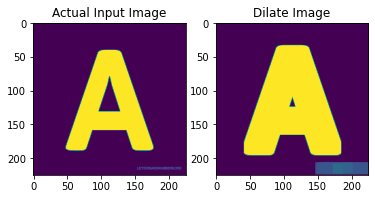

In [7]:
img=cv2.imread('C:/Users/sharv/a.png',0)
kernel=np.ones((15,15),np.uint8)
dilation=cv2.dilate(img,kernel,iterations=1)

plt.subplot(121),plt.imshow(img),plt.title('Actual Input Image')

#plt.subplot(122),plt.imshow(erosion),plt.title('Erode Image')

plt.subplot(122),plt.imshow(dilation),plt.title('Dilate Image')

plt.show()

### 3. Opening
Opening is just another name of erosion followed by dilation. It is useful in removing noise, as we explained above. Here we use the function, cv.morphologyEx()# 

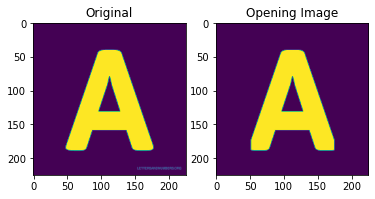

In [3]:
img = cv2.imread('C:/Users/sharv/a.png',0)
kernel = np.ones((15,15),np.uint8)
opening = cv2.morphologyEx(img,cv2.MORPH_OPEN,kernel)

plt.subplot(121),plt.imshow(img),plt.title('Original')

plt.subplot(122),plt.imshow(opening),plt.title('Opening Image')

plt.show()


### 4. Closing
Closing is reverse of Opening, Dilation followed by Erosion. It is useful in closing small holes inside the foreground objects, or small black points on the object.

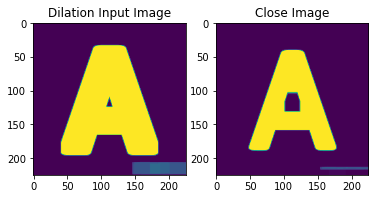

In [8]:

img=cv2.imread('C:/Users/sharv/a.png',0)
kernel=np.ones((15,15),np.uint8)

close=cv2.morphologyEx(img,cv2.MORPH_CLOSE,kernel)

plt.subplot(121),plt.imshow(dilation),plt.title('Dilation Input Image')

plt.subplot(122),plt.imshow(close),plt.title('Close Image')

plt.show()

#  Morphological Gradient
It is the difference between dilation and erosion of an image.

The result will look like the outline of the object.

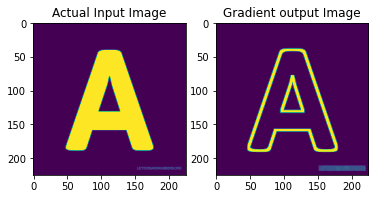

In [9]:
img=cv2.imread('C:/Users/sharv/a.png',0)
kernel=np.ones((5,5),np.uint8)
gradient=cv2.morphologyEx(img,cv2.MORPH_GRADIENT,kernel)

plt.subplot(121),plt.imshow(img),plt.title('Actual Input Image')


plt.subplot(122),plt.imshow(gradient),plt.title('Gradient output Image')

plt.show()

# Image Gredient

(Text(0.5, 1.0, 'Sobel Y'),
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

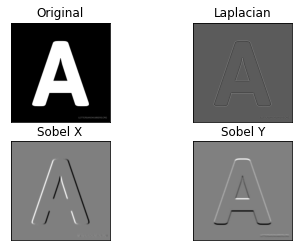

In [10]:
img=cv2.imread('C:/Users/sharv/a.png',0)
laplacian=cv2.Laplacian(img,cv2.CV_64F)
sobe1x=cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
sobe1y=cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)

plt.subplot(2,2,1),plt.imshow(img,cmap='gray')
plt.title('Original'),plt.xticks([]),plt.yticks([])

plt.subplot(2,2,2),plt.imshow(laplacian,cmap='gray')
plt.title('Laplacian'),plt.xticks([]),plt.yticks([])

plt.subplot(2,2,3),plt.imshow(sobe1x,cmap='gray')
plt.title('Sobel X'),plt.xticks([]),plt.yticks([])

plt.subplot(2,2,4),plt.imshow(sobe1y,cmap='gray')
plt.title('Sobel Y'),plt.xticks([]),plt.yticks([])

# Canny Edge Detection 

(Text(0.5, 1.0, 'Edge Image'),
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

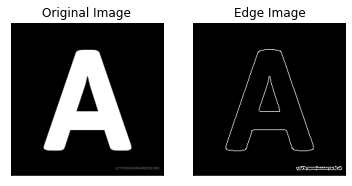

In [11]:
img=cv2.imread('C:/Users/sharv/a.png',0)
edges=cv2.Canny(img,100,200)

plt.subplot(121),plt.imshow(img,cmap='gray')
plt.title('Original Image'),plt.xticks([]),plt.yticks([])

plt.subplot(122),plt.imshow(edges,cmap='gray')
plt.title('Edge Image'),plt.xticks([]),plt.yticks([])

# Contour

In [14]:
img=cv2.imread('C:/Users/sharv/a.png')
img_gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret,thresh=cv2.threshold(img_gray,127,255,0)

contours,hierarchy=cv2.findContours(thresh,2,1)
cnt=contours[0]

hull= cv2.convexHull(cnt,returnPoints=False)
defects= cv2.convexityDefects(cnt,hull)

for i in range(defects.shape[0]):
    s,e,f,d=defects[i,0]
    start=tuple(cnt[s][0])
    end=tuple(cnt[e][0])
    far=tuple(cnt[f][0])
    cv2.line(img,start,end,[0,255,0],2)
    cv2.circle(img,far,5,[0,0,255],-1)
    
cv2.imshow('CONTOUR_Image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()